# Mapa de los datos del viento solar

## Normalizados al valor extremo de cada parámetro

In [1]:
vs = readdlm("omni2_14800.lst")

720x11 Array{Float64,2}:
 2012.0  153.0   0.0   5.1  -3.7   2.9  -1.7   13718.0   8.4  358.0   27.0
 2012.0  153.0   1.0   5.0  -3.9   1.7  -2.5   12482.0   8.4  355.0   23.0
 2012.0  153.0   2.0   5.2  -4.5   0.9  -2.5   10074.0   7.0  354.0   19.0
 2012.0  153.0   3.0   4.8  -2.8  -2.3  -1.5   15801.0   7.9  364.0   18.0
 2012.0  153.0   4.0   5.3   1.0  -5.0   1.4   12985.0   5.6  366.0   17.0
 2012.0  153.0   5.0   5.7   1.9  -4.8   2.5    9368.0   3.8  361.0   15.0
 2012.0  153.0   6.0   5.8   2.3  -3.9   3.5    9684.0   4.2  357.0   18.0
 2012.0  153.0   7.0   6.0   2.0  -3.9   4.0    9549.0   3.4  358.0   19.0
 2012.0  153.0   8.0   6.1   2.1  -3.0   4.8   11203.0   3.0  353.0   19.0
 2012.0  153.0   9.0   6.2   2.0  -3.1   5.0   11891.0   2.8  350.0   19.0
 2012.0  153.0  10.0   6.2   1.6  -1.6   5.7   14798.0   3.3  354.0   24.0
 2012.0  153.0  11.0   5.8   1.3  -1.0   5.5   21869.0   5.3  363.0   29.0
 2012.0  153.0  12.0   5.0   1.5  -2.4   2.7   28406.0   7.8  363.0   24.0


In [2]:
vs_matrix = vs[:,4:end] # se dejan sólo los datos

720x8 Array{Float64,2}:
  5.1  -3.7   2.9  -1.7   13718.0   8.4  358.0   27.0
  5.0  -3.9   1.7  -2.5   12482.0   8.4  355.0   23.0
  5.2  -4.5   0.9  -2.5   10074.0   7.0  354.0   19.0
  4.8  -2.8  -2.3  -1.5   15801.0   7.9  364.0   18.0
  5.3   1.0  -5.0   1.4   12985.0   5.6  366.0   17.0
  5.7   1.9  -4.8   2.5    9368.0   3.8  361.0   15.0
  5.8   2.3  -3.9   3.5    9684.0   4.2  357.0   18.0
  6.0   2.0  -3.9   4.0    9549.0   3.4  358.0   19.0
  6.1   2.1  -3.0   4.8   11203.0   3.0  353.0   19.0
  6.2   2.0  -3.1   5.0   11891.0   2.8  350.0   19.0
  6.2   1.6  -1.6   5.7   14798.0   3.3  354.0   24.0
  5.8   1.3  -1.0   5.5   21869.0   5.3  363.0   29.0
  5.0   1.5  -2.4   2.7   28406.0   7.8  363.0   24.0
  ⋮                                 ⋮                
 11.4   4.7  -5.5  -3.8  492838.0  11.1  606.0    3.0
 11.1   5.6  -3.7   3.0  448548.0  12.2  601.0    6.0
 11.1   5.6   0.8  -1.5  400412.0  10.5  615.0    1.0
  9.7   7.5   0.2   0.1  414347.0  10.1  612.0    1.0
  9.

In [4]:
#Normalización
VSNorm = zeros(720,8)
for i = 1:8
    VSNorm[:,i] = vs_matrix[:,i]/maximum(abs(vs_matrix[:,i]))
end

In [20]:
VSNorm_inv = VSNorm[:,end:-1:1]

720x8 Array{Float64,2}:
  0.284211   0.487075  0.153565   …   0.0773333   -0.305785   0.127182
  0.242105   0.482993  0.153565       0.0453333   -0.322314   0.124688
  0.2        0.481633  0.127971       0.024       -0.371901   0.129676
  0.189474   0.495238  0.144424      -0.0613333   -0.231405   0.119701
  0.178947   0.497959  0.102377      -0.133333     0.0826446  0.13217 
  0.157895   0.491156  0.0694698  …  -0.128        0.157025   0.142145
  0.189474   0.485714  0.0767824     -0.104        0.190083   0.144638
  0.2        0.487075  0.0621572     -0.104        0.165289   0.149626
  0.2        0.480272  0.0548446     -0.08         0.173554   0.15212 
  0.2        0.47619   0.0511883     -0.0826667    0.165289   0.154613
  0.252632   0.481633  0.0603291  …  -0.0426667    0.132231   0.154613
  0.305263   0.493878  0.0968921     -0.0266667    0.107438   0.144638
  0.252632   0.493878  0.142596      -0.064        0.123967   0.124688
  ⋮                               ⋱   ⋮              

In [5]:
using PyPlot

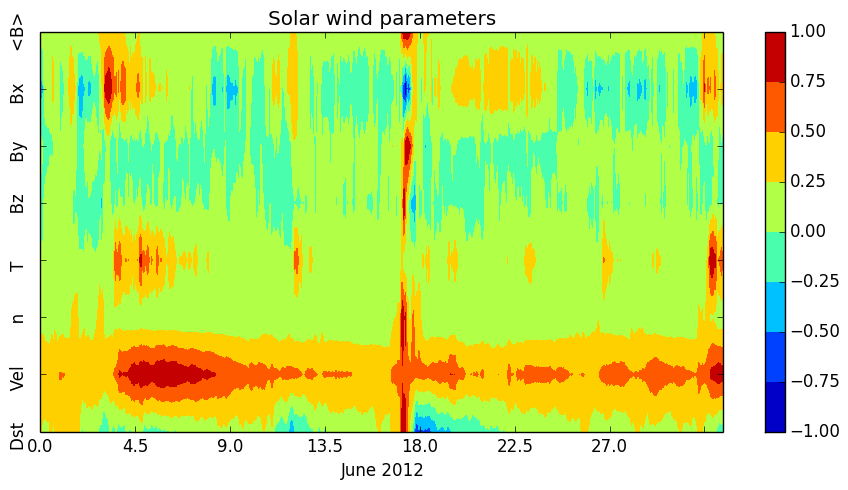

PyObject <matplotlib.colorbar.Colorbar instance at 0x31b25f248>

In [61]:
letreros =["Bx","By","Bz","n","T","V","Dst"]
fig = figure("pyplot_contourplot",figsize=(11,5))
#ax = fig[:add_subplot](2,1,1, projection = "3d") 
mapa = contourf(VSNorm_inv', labels = letreros)
title("Solar wind parameters")
ylabel("Dst      Vel        n        T         Bz      By       Bx      <B>")
xlabel("June 2012")
ax1 = gca()
#ax1[:ylabel]("labels=letreros")
ax1[:xaxis][:set_ticklabels](0:4.5:30)
ax1[:yaxis][:set_ticklabels]("","Bx","By","Bz","n","T","V", "Dst")
colorbar()
#setp(ax1[:get_yticklabels]("labels=letreros"))

In [14]:
VSNorm

720x8 Array{Float64,2}:
 0.127182  -0.305785    0.0773333   …  0.153565   0.487075   0.284211 
 0.124688  -0.322314    0.0453333      0.153565   0.482993   0.242105 
 0.129676  -0.371901    0.024          0.127971   0.481633   0.2      
 0.119701  -0.231405   -0.0613333      0.144424   0.495238   0.189474 
 0.13217    0.0826446  -0.133333       0.102377   0.497959   0.178947 
 0.142145   0.157025   -0.128       …  0.0694698  0.491156   0.157895 
 0.144638   0.190083   -0.104          0.0767824  0.485714   0.189474 
 0.149626   0.165289   -0.104          0.0621572  0.487075   0.2      
 0.15212    0.173554   -0.08           0.0548446  0.480272   0.2      
 0.154613   0.165289   -0.0826667      0.0511883  0.47619    0.2      
 0.154613   0.132231   -0.0426667   …  0.0603291  0.481633   0.252632 
 0.144638   0.107438   -0.0266667      0.0968921  0.493878   0.305263 
 0.124688   0.123967   -0.064          0.142596   0.493878   0.252632 
 ⋮                                  ⋱  ⋮             

In [18]:
?colorbar

search: colorbar





Add a colorbar to a plot.

Function signatures for the :mod:`~matplotlib.pyplot` interface; all
but the first are also method signatures for the
:meth:`~matplotlib.figure.Figure.colorbar` method::

  colorbar(**kwargs)
  colorbar(mappable, **kwargs)
  colorbar(mappable, cax=cax, **kwargs)
  colorbar(mappable, ax=ax, **kwargs)

arguments:

  *mappable*
    the :class:`~matplotlib.image.Image`,
    :class:`~matplotlib.contour.ContourSet`, etc. to
    which the colorbar applies; this argument is mandatory for the
    :meth:`~matplotlib.figure.Figure.colorbar` method but optional for the
    :func:`~matplotlib.pyplot.colorbar` function, which sets the
    default to the current image.

keyword arguments:

  *cax*
    None | axes object into which the colorbar will be drawn
  *ax*
    None | parent axes object(s) from which space for a new
    colorbar axes will be stolen. If a list of axes is given
    they will all be resized to make room for the colorbar axes.
  *use_gridspec*
    Fals